# Python ile Veri Bİlimine Giriş Dersinin Projesi
## Oğuzhan Demir

In [257]:
#Gerekli kütüphaneler ve veri seti projeye dahil ediliyor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp
df = pd.read_spss("1ResearchProjectData.sav")

## Veri Setini Tanıyalım
* Veri setinin amacı orta okul çocuklarına matematik öğretirken hangi yaklaşımın daha iyi olduğnu ölçmek.
* İki tane yaklaşım bulunmakta: Birisi geleneksel denebilecek Wesson'ın yaklaşımı; diğeri ise daha interaktif olan Ruger ve Smith'in yaklaşımı

In [258]:
df.info()# Veri seti hakkında bilgi alıyoruz
print(df.sample(5)) # 5 tane random örneğe bakıyoruz

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Student   216 non-null    float64 
 1   Teacher   216 non-null    category
 2   Gender    216 non-null    category
 3   Ethnic    216 non-null    category
 4   Freeredu  216 non-null    category
 5   Score     216 non-null    float64 
 6   wesson    217 non-null    category
dtypes: category(5), float64(2)
memory usage: 5.3 KB
     Student Teacher  Gender            Ethnic    Freeredu  Score       wesson
196    197.0  Wesson  Female  African-American  Free lunch   83.0       Wesson
77      78.0   Smith    Male  African-American  Paid lunch   72.0  Ruger_Smith
165    166.0  Wesson  Female          Hispanic  Free lunch   76.0       Wesson
89      90.0   Smith    Male  African-American  Paid lunch   80.0  Ruger_Smith
88      89.0   Smith  Female             Asian  Paid lunch   85.0  Ruger_Smith


## Veri Setini Düzenleyelim

In [259]:
df.isnull().values.any()# Veri setinde null veri var mı diye bakıyoruz

True

In [260]:
df.isnull().sum()

Student     1
Teacher     1
Gender      1
Ethnic      1
Freeredu    1
Score       1
wesson      0
dtype: int64

In [261]:
df.dropna(inplace = True)# Bir tane Null olduğu için başka bir işlem yapmadan direkt verisetinden çıkarıyoruz 

In [262]:
df.isnull().values.any()

False

In [263]:
df.isnull().sum()

Student     0
Teacher     0
Gender      0
Ethnic      0
Freeredu    0
Score       0
wesson      0
dtype: int64

In [264]:
df.duplicated().sum() # Kopyalanmış veri var mı diye bakıyoruz

0

In [265]:
df = df.astype({"Student": int}, errors='raise') # Student sütununu floatdan integera çeviriyoruz
df.Student.dtype

dtype('int32')

In [266]:
#Burada daha anlaşılır olması için wesson sütunu yerine Method adında kendi sütunumuzu ekliyoruz
df['Method'] = df['wesson'].apply(lambda x: 'Standard' if 'Ruger_Smith' in x else 'Traditional')
df.drop(['wesson'], axis=1, inplace = True)

In [267]:
df.Method.value_counts()

Standard       140
Traditional     76
Name: Method, dtype: int64

In [268]:
#Ardından bir daha verisetine bakış atıyoruz
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 0 to 215
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Student   216 non-null    int32   
 1   Teacher   216 non-null    category
 2   Gender    216 non-null    category
 3   Ethnic    216 non-null    category
 4   Freeredu  216 non-null    category
 5   Score     216 non-null    float64 
 6   Method    216 non-null    category
dtypes: category(5), float64(1), int32(1)
memory usage: 6.0 KB


In [269]:
df.sample(5)

,Student,Teacher,Gender,Ethnic,Freeredu,Score,Method
59,60,Ruger,Male,Hispanic,Paid lunch,54.0,Standard
110,111,Smith,Female,Asian,Paid lunch,48.0,Standard
13,14,Ruger,Male,Caucasian,Free lunch,48.0,Standard
138,139,Smith,Female,Asian,Paid lunch,71.0,Standard
134,135,Smith,Male,Hispanic,Paid lunch,82.0,Standard


## Bazı Detaylara Bakış

In [112]:
#Veri setini tanımlıyoruz
df.describe()

,Student,Score
count,216.000,216.000000
mean,108.500,65.273148
std,62.498,16.361453
min,1.000,30.000000
25%,54.750,53.000000
50%,108.500,65.000000
75%,162.250,79.000000
max,216.000,95.000000


In [15]:
#Kategorik değişkenlerin dağılımına bakıyoruz
#Genel olarak dengeli dağıldığı gözlemleniyor
rp.summary_cat(df[["Teacher","Gender","Ethnic","Freeredu"]])

,Variable,Outcome,Count,Percent
0,Teacher,Wesson,76,35.19
1,,Ruger,71,32.87
2,,Smith,69,31.94
3,Gender,Male,120,55.56
4,,Female,96,44.44
5,Ethnic,Hispanic,66,30.56
6,,Asian,53,24.54
7,,African-American,52,24.07
8,,Caucasian,45,20.83
9,Freeredu,Paid lunch,112,51.85


In [16]:
#eleman sayısı, ortalama ve standart sapma gibi verlere bakış
rp.summary_cont(df[["Score"]])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Score,216.0,65.2731,16.3615,1.1133,63.0789,67.4674


In [17]:
df.groupby('Gender')['Score'].mean() # Cinsiyete göre ortalamanın pek fazla değişmediği gözlemleniyor

Gender
Female    67.656250
Male      63.366667
Name: Score, dtype: float64

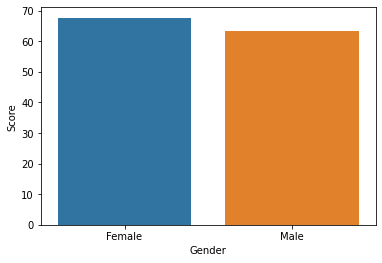

In [18]:
sns.barplot(data = df, x = 'Gender', y = 'Score', ci = None);

In [19]:
df.groupby('Ethnic')['Score'].mean() #Etnik kökene göre ortalamanın pek fazla etkilenmdiği gözlemleniyor

Ethnic
African-American    66.230769
Asian               65.698113
Caucasian           64.333333
Hispanic            64.818182
Name: Score, dtype: float64

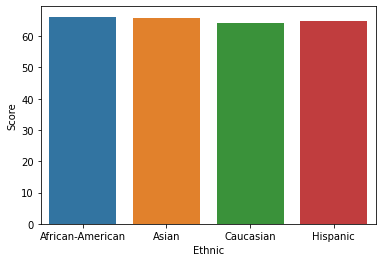

In [20]:
sns.barplot(data = df, x = 'Ethnic', y = 'Score', ci = None);

In [21]:
df.groupby('Freeredu')['Score'].mean() #Yemeklerin bedava olup olmamasına göre ortalamanın pek fazla etkilenmdiği gözlemleniyor

Freeredu
Free lunch    66.028846
Paid lunch    64.571429
Name: Score, dtype: float64

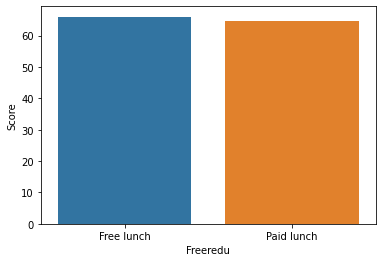

In [22]:
sns.barplot(data = df, x = 'Freeredu', y = 'Score', ci = None);

In [23]:
df.groupby('Method')['Score'].mean() #Metodun ortalamaya etkisinin olduğu gözlemleniyor

Method
Standard       62.335714
Traditional    70.684211
Name: Score, dtype: float64

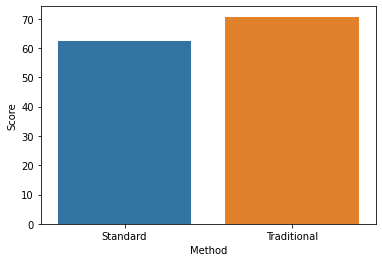

In [24]:
sns.barplot(data = df, x = 'Method', y = 'Score', ci = None);

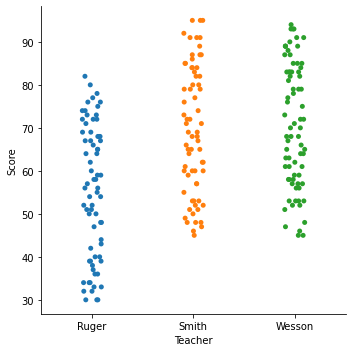

In [25]:
sns.catplot(x = "Teacher", y = "Score", data= df); #Ortalamayı en çok etkileyen faktörün öğretmenler olduğu gözlemleniyor

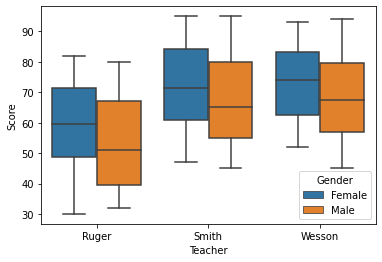

In [26]:
sns.boxplot(x = "Teacher", y = "Score",hue = "Gender", data = df);

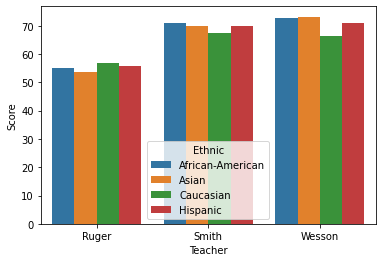

In [27]:
sns.barplot(data = df, x = 'Teacher', y = 'Score',hue = "Ethnic", ci = None);

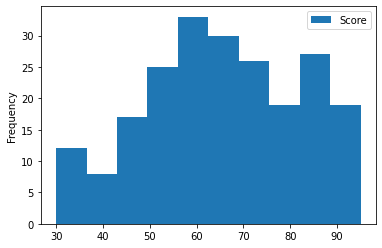

In [28]:
#Histograma bakıyoruz
# Alınan en yoğun notun 50-60 arası olduğu gözlemleniyor 
pd.DataFrame(df.Score).plot.hist();

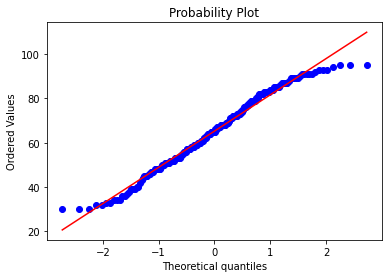

In [29]:
#Dağılımı inceliyoruz
import pylab
import scipy.stats as stats
stats.probplot(df.Score, dist="norm", plot=pylab)
pylab.show()

### Buradan çıkarlan sonuç
Öğrencilerin ders notlarını etkileyen en önemli etmen metodlardan ziyade hocaları olmuş

## Veri Ön İşleme

### Aykırılık Kontrolü

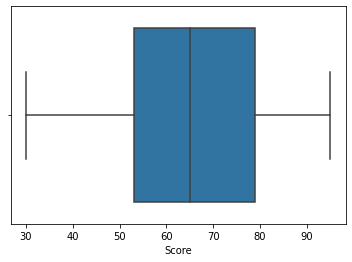

In [270]:
#aykırı değer tespiti
sns.boxplot(x = df.Score);

In [271]:
#Üst alt baremler ve aralarındaki farkına bakıyoruz
Q1 = df.Score.quantile(0.25)
Q3 = df.Score.quantile(0.75)
IQR = Q3-Q1
print(Q1)
print(Q3)
print(IQR)

53.0
79.0
26.0


In [272]:
#Aykırılık sınırını belirliyoruz
alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR
print(alt_sinir)
print(ust_sinir)

14.0
118.0


In [273]:
#Bu sınırlar dışında veri var mı diye bakıyoruz
aykiri_tf = (df.Score < alt_sinir) | (df.Score > ust_sinir)
df.Score[aykiri_tf]
#Ve olmadığını görüyoruz

Series([], Name: Score, dtype: float64)

### Gereksiz sütunları çıkarma

In [274]:
#İndex'i student'a eşitleyip student'ı kaldırıyoruz
df.index=df["Student"]
df.drop(['Student'], axis=1, inplace = True)
df

,Teacher,Gender,Ethnic,Freeredu,Score,Method
Student,,,,,,
1,Ruger,Female,Asian,Free lunch,76.0,Standard
2,Ruger,Female,Hispanic,Paid lunch,56.0,Standard
3,Ruger,Female,African-American,Free lunch,34.0,Standard
4,Ruger,Female,Asian,Paid lunch,59.0,Standard
5,Ruger,Male,Hispanic,Free lunch,73.0,Standard
...,...,...,...,...,...,...
212,Wesson,Male,African-American,Paid lunch,56.0,Traditional
213,Wesson,Male,Hispanic,Free lunch,94.0,Traditional
214,Wesson,Male,Hispanic,Paid lunch,91.0,Traditional


In [275]:
# One hot olmadan veri setindeki kategorik verileri sayısallaştırıyoruz
#not one hot
df_not_one_hot = df.copy()
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
lbe.fit_transform(df_not_one_hot["Gender"])
df_not_one_hot["Gender"] = lbe.fit_transform(df_not_one_hot["Gender"])

lbe.fit_transform(df_not_one_hot["Ethnic"])
df_not_one_hot["Ethnic"] = lbe.fit_transform(df_not_one_hot["Ethnic"])

lbe.fit_transform(df_not_one_hot["Teacher"])
df_not_one_hot["Teacher"] = lbe.fit_transform(df_not_one_hot["Teacher"])


lbe.fit_transform(df_not_one_hot["Freeredu"])
df_not_one_hot["Freeredu"] = lbe.fit_transform(df_not_one_hot["Freeredu"])

lbe.fit_transform(df_not_one_hot["Method"])
df_not_one_hot["Method"] = lbe.fit_transform(df_not_one_hot["Method"])

In [276]:
df_not_one_hot

,Teacher,Gender,Ethnic,Freeredu,Score,Method
Student,,,,,,
1,0,0,1,0,76.0,0
2,0,0,3,1,56.0,0
3,0,0,0,0,34.0,0
4,0,0,1,1,59.0,0
5,0,1,3,0,73.0,0
...,...,...,...,...,...,...
212,2,1,0,1,56.0,1
213,2,1,3,0,94.0,1
214,2,1,3,1,91.0,1


### One Hot İşlemi ve Dummy değişken tuzağını engelleme

In [277]:
# drop first komutu sayesinde dummy değişken tuzağını çözüyoruz
#Get dummies fonksiyonu sayesinde de one hot işlemini yapıyoruz
df_not_drop = pd.get_dummies(df, prefix=['Teacher', 'Gender', 'Ethnic','Freeredu','Method'])
df_one_hot = pd.get_dummies(df, prefix=['Teacher', 'Gender', 'Ethnic','Freeredu','Method'], drop_first=True)
df_one_hot

,Score,Teacher_Smith,Teacher_Wesson,Gender_Male,Ethnic_Asian,Ethnic_Caucasian,Ethnic_Hispanic,Freeredu_Paid lunch,Method_Traditional
Student,,,,,,,,,
1,76.0,0,0,0,1,0,0,0,0
2,56.0,0,0,0,0,0,1,1,0
3,34.0,0,0,0,0,0,0,0,0
4,59.0,0,0,0,1,0,0,1,0
5,73.0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
212,56.0,0,1,1,0,0,0,1,1
213,94.0,0,1,1,0,0,1,0,1
214,91.0,0,1,1,0,0,1,1,1


## Makine Öğrenmesi

### Doğrusal Regresyon

In [443]:
#korelasyonlara bakıyoruz
#Görüyoruz ki skora en çok etki eden şey öğretmen
df_not_one_hot.corr()

,Teacher,Gender,Ethnic,Freeredu,Score,Method
Teacher,1.000000,-0.020086,0.005374,-0.051603,0.385765,0.872792
Gender,-0.020086,1.000000,-0.043879,0.014503,-0.130579,-0.043355
Ethnic,0.005374,-0.043879,1.000000,0.065605,-0.037327,0.025314
Freeredu,-0.051603,0.014503,0.065605,1.000000,-0.044611,-0.104917
Score,0.385765,-0.130579,-0.037327,-0.044611,1.000000,0.244237
Method,0.872792,-0.043355,0.025314,-0.104917,0.244237,1.000000


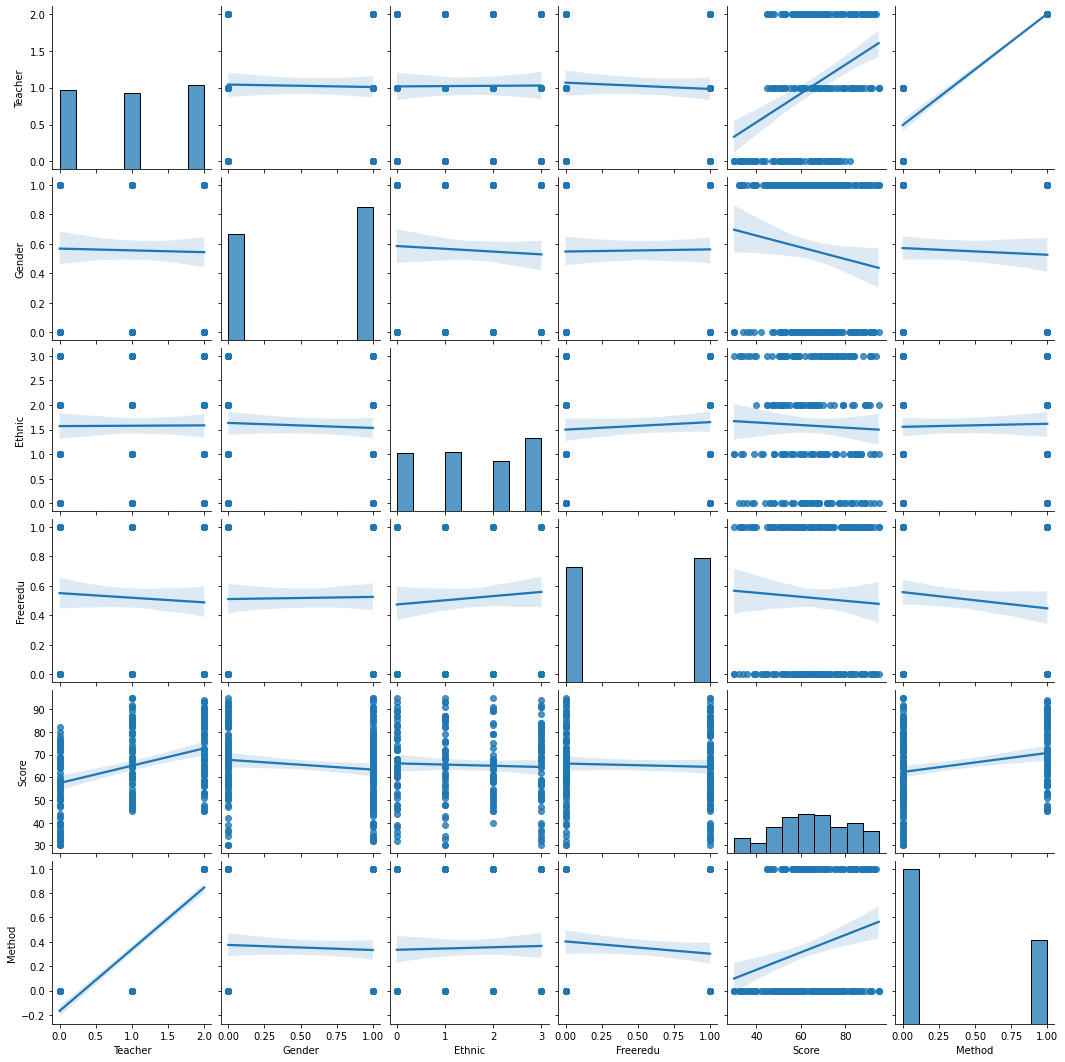

In [444]:
#Regresyonlara bakıyoruz 
#Görüyoruz ki skora en çok etki eden şey öğretmen
import seaborn as sns
sns.pairplot(df_not_one_hot, kind  ="reg");

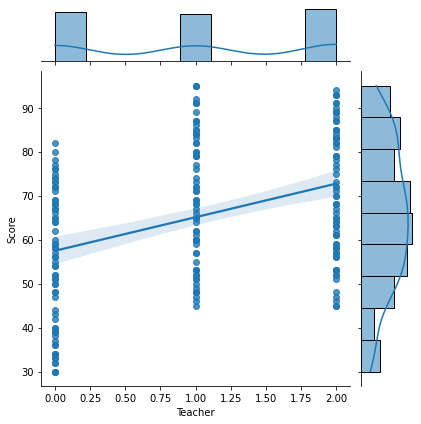

In [445]:
#Burada öğretmen ve skora daha detaylı bakıyoruz
sns.jointplot(x = "Teacher", y = "Score", data = df_not_one_hot, kind = "reg")

**Statsmodels ile modelleme**

In [446]:
#bir bağımlı değişken ile deniyoruz
import statsmodels.api as sm
X = df_not_one_hot[["Teacher"]]
X[0:5]

,Teacher
Student,
1,0
2,0
3,0
4,0
5,0


In [447]:
from warnings import filterwarnings
filterwarnings('ignore')
#uyarıları kapatmak icin

In [448]:
#elinizde tek degiskenli bir matris var ve regresyon problemini cozmek icin, matris islemlerinin yapilabilmesi icin
#matrise sabit 1 ifadesi eklememiz gerekiyor (beta0 için kullanacagiz).
X = sm.add_constant(data=X)
X[0:5]

,const,Teacher
Student,,
1,1.0,0
2,1.0,0
3,1.0,0
4,1.0,0
5,1.0,0


In [449]:
#bağımsız değişkenimizi de alıyoruz
y = df_not_one_hot["Score"]
y[0:5]

Student
1    76.0
2    56.0
3    34.0
4    59.0
5    73.0
Name: Score, dtype: float64

In [450]:
#modelin kurulması
lm = sm.OLS(y,X)
#modelin fit edilmesi
model = lm.fit()
#model ciktilarinin alinmasi
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     37.41
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           4.48e-09
Time:                        14:57:02   Log-Likelihood:                -892.29
No. Observations:                 216   AIC:                             1789.
Df Residuals:                     214   BIC:                             1795.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.4602      1.641     35.025      0.000      54.227      60.694
Teacher        7.6362      1.248      6.117      0.000       5.175      10.097
==============================================================================
Omnibus:                       59.901   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.923
Skew:                          -0.043   Prob(JB):                      0.00425
Kurtosis:                       1.902   Cond. No.                         2.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [451]:
#modelin hata kareler ortalaması
model.mse_model

8564.998168547878

In [452]:
#modelden tahmin edilen y değerleri
model.fittedvalues[0:5]

Student
1    57.460207
2    57.460207
3    57.460207
4    57.460207
5    57.460207
dtype: float64

In [453]:
#gercek y degerleri
y[0:5]

Student
1    76.0
2    56.0
3    34.0
4    59.0
5    73.0
Name: Score, dtype: float64

In [454]:
#model denklemi
print("Score = " +  str("%.2f" % model.params[0]) + " + Teacher" + "*" + str("%.2f" % model.params[1]))

Score = 57.46 + Teacher*7.64


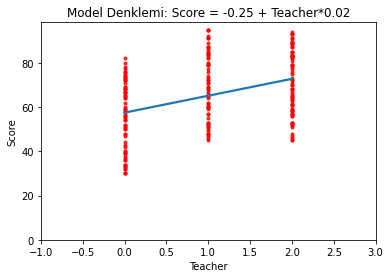

In [455]:
#modelin görsel olarak ifade edilmesi
g = sns.regplot(df_not_one_hot["Teacher"], df_not_one_hot["Score"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Score = -0.25 + Teacher*0.02")
g.set_ylabel("Score")
g.set_xlabel("Teacher")
import matplotlib.pyplot as plt
plt.xlim(-1,3)
plt.ylim(bottom=0);


Tahmini ve gerçek skorların ortalamalarına bakıyoruz

In [456]:
Score = 57.46 + 0*7.64
Score

57.46

In [457]:
Score = 57.46 + 1*7.64
Score

65.1

In [458]:
Score = 57.46 + 2*7.64
Score

72.74

In [459]:
df.groupby('Teacher')['Score'].mean()

Teacher
Ruger     55.267606
Smith     69.608696
Wesson    70.684211
Name: Score, dtype: float64

Bir de method değişkeni kullanarak bakıyoruz

In [460]:
X = df_not_one_hot[["Method"]]
X = sm.add_constant(data=X)
y = df_not_one_hot["Score"]
lm = sm.OLS(y,X)
model = lm.fit()
print("Score = " +  str("%.2f" % model.params[0]) + " + Method" + "*" + str("%.2f" % model.params[1]))

Score = 62.34 + Method*8.35


In [461]:
Score = 62.34 + 0*8.35
Score

62.34

In [462]:
Score = 62.34 + 1*8.35
Score

70.69

In [463]:
df.groupby('Method')['Score'].mean()

Method
Standard       62.335714
Traditional    70.684211
Name: Score, dtype: float64

Method değişkeni ile modelin ortalamaları neredeyse aynı tahmin ettiğini gözlemliyoruz. Bu analiz yöntemi için en uygun değişkenin Method olduğunu gözlemliyoruz

**Artıklar ve Makine Öğrenmesindeki Önemi**


In [464]:
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.formula.api as smf
X = df_not_one_hot[["Method"]]
X = sm.add_constant(data=X)
y = df_not_one_hot["Score"]
lm = sm.OLS(y,X)
model = lm.fit()

In [465]:
mse = mean_squared_error(y, model.fittedvalues)
#gerçek değerler ile tahmin edilen değerler arasındaki farkların karelerinin ortalaması
print("MSE: ",mse)

MSE:  250.56315963519907


In [466]:
import numpy as np
#mse'nin karekökünün alınması ile meydana gelen rmse
rmse = np.sqrt(mse)
print("RMSE: ",rmse)

RMSE:  15.829186954332148


In [467]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]
k_t

,gercek_y,tahmin_y,hata,hata_kare
Student,,,,
1,76.0,62.335714,13.664286,186.712704
2,56.0,62.335714,-6.335714,40.141276
3,34.0,62.335714,-28.335714,802.912704
4,59.0,62.335714,-3.335714,11.126990
5,73.0,62.335714,10.664286,113.726990
6,58.0,62.335714,-4.335714,18.798418
7,62.0,62.335714,-0.335714,0.112704
8,40.0,62.335714,-22.335714,498.884133
9,82.0,62.335714,19.664286,386.684133


In [468]:
k_t["hata_kare"] = k_t["hata"]**2
k_t

,gercek_y,tahmin_y,hata,hata_kare
Student,,,,
1,76.0,62.335714,13.664286,186.712704
2,56.0,62.335714,-6.335714,40.141276
3,34.0,62.335714,-28.335714,802.912704
4,59.0,62.335714,-3.335714,11.126990
5,73.0,62.335714,10.664286,113.726990
6,58.0,62.335714,-4.335714,18.798418
7,62.0,62.335714,-0.335714,0.112704
8,40.0,62.335714,-22.335714,498.884133
9,82.0,62.335714,19.664286,386.684133


In [469]:
#toplam hata
np.sum(k_t["hata_kare"])

2304.4698979591835

In [470]:
#hata kareler ortalaması
np.mean(k_t["hata_kare"])

230.44698979591834

In [471]:
#hata kareler ortalamasının karekoku
np.sqrt(np.mean(k_t["hata_kare"]))

15.180480552206452

In [472]:
#her bir tahmin için artıklar (hatalar)
model.resid[0:10]

Student
1     13.664286
2     -6.335714
3    -28.335714
4     -3.335714
5     10.664286
6     -4.335714
7     -0.335714
8    -22.335714
9     19.664286
10    15.664286
dtype: float64

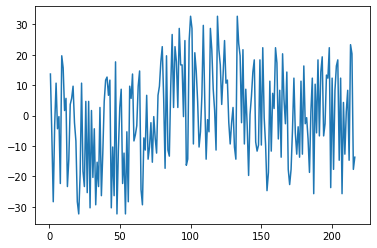

In [473]:
#artıkların görselleştirilmesi
#bu hatalar verisetindeki aykırı değerlerden mi kaynaklanıyor gibi soruların sorulabileceği 
#ve bu sorulara yanıt aramaya bizi sevk edecek gözlemler
plt.plot(model.resid)

### Çoklu Doğrusal Regresyon

In [474]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = df_not_one_hot.drop("Score", axis = 1)
y = df_not_one_hot["Score"]
#randomstate her üretme işleminde farklı değerler çıkmasını istemedigimizden rastgele bir değer veriyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(172, 5)
(172,)
(44, 5)
(44,)


In [475]:
#verisetinin bütününün kopyası
training = df.copy()
training.shape

(216, 6)

In [476]:
#modeli oluşturma
import statsmodels.api as sm
lm = sm.OLS(y_train, X_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Score   R-squared (uncentered):                   0.839
Model:                            OLS   Adj. R-squared (uncentered):              0.834
Method:                 Least Squares   F-statistic:                              173.7
Date:                Mon, 06 Jun 2022   Prob (F-statistic):                    3.13e-64
Time:                        14:58:48   Log-Likelihood:                         -810.05
No. Observations:                 172   AIC:                                      1630.
Df Residuals:                     167   BIC:                                      1646.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Teacher       37.3694      4.807      7.775      0.000      27.880      46.859
Gender        11.7505      3.869      3.037      0.003       4.112      19.389
Ethnic        10.2165      1.525      6.701      0.000       7.206      13.227
Freeredu      14.9487      3.971      3.764      0.000       7.109      22.788
Method       -32.7170      9.089     -3.600      0.000     -50.661     -14.773
==============================================================================
Omnibus:                        2.291   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.318   Jarque-Bera (JB):                2.132
Skew:                           0.188   Prob(JB):                        0.344
Kurtosis:                       2.605   Cond. No.                         11.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Bakıldığında R karenin 0.149'dan 0.834'e arttığı gözlemleniyor. P-valuenun da 4.48e-09'dan 3.13e-64'e düştüğü gözlemleniyor

In [477]:
#parametreleri bastırma
print(model.params)

Teacher     37.369359
Gender      11.750520
Ethnic      10.216538
Freeredu    14.948691
Method     -32.717016
dtype: float64


In [478]:
#Sklearn ile yeniden yapıyoruz
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X_train, y_train)
#sabit katsayı
print(model.intercept_)
#bağımsız deşişken katsayıları 
print(model.coef_)

59.65865070006626
[ 15.53742849  -5.6904678   -0.43853797  -1.44881654 -16.33223054]


Tahmin yapıyoruz

In [479]:
#böyle bir veri setinde sonucun ne olduğunu tahmin ediyoruz
yeni_veri = [[0], [0],[0],[0],[0]]
yeni_veri = pd.DataFrame(yeni_veri).T
yeni_veri

,0,1,2,3,4
0,0,0,0,0,0


In [480]:
model.predict(yeni_veri) #Tahmin sonucu

array([59.6586507])

In [481]:
from sklearn.metrics import mean_squared_error
#eğitim hatası
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
print("RMSE Train: ",rmse)

RMSE:  14.485226578783642


In [482]:
#test hatası
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
print("RMSE Test: ",rmse)

RMSE Test:  14.90302267441275


Diğer yöntemlere göre daha iyi bir sonuç aldık

***Model doğrulama***

In [402]:

X = df_not_one_hot.drop('Score', axis=1)
y = df_not_one_hot["Score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=90)
lm = LinearRegression() 
model = lm.fit(X_train, y_train)

In [483]:
rmseTrain=np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
print("RMSE Train: ",rmseTrain)
rmseTest=np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
print("RMSE Test: ", rmseTest)
model.score(X_train, y_train)

RMSE Train:  14.485226578783642
RMSE Train:  14.90302267441275


0.22228122998314692

In [485]:
#eğitim verileri için çapraz doğrulama ile elde edilmiş ortalama r2 skoru
cross_val_score(model, X_train, y_train, cv = 10, scoring = "r2").mean()

0.11453312253896604

In [487]:
#neg_mean_squared_error'da sonuc negatif olacağı için üstte (-) ile çarpıyoruz 
rmseTrain=np.sqrt(-cross_val_score(model, 
                X_train, 
                y_train, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()
print("RMSE Train: ",rmseTrain)
rmseTest=np.sqrt(-cross_val_score(model, 
                X_test, 
                y_test, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()
print("RMSE Test: ",rmseTest)

RMSE Train:  14.870461926857008
RMSE Test:  17.05247918162859


Cros validation ile hatanın biraz daha fazla çıkıyor

### PCR (Temel Bileşen Regresyonu - Principal Component Regression)


***Model***

In [561]:
y = df_one_hot["Score"]

In [564]:
X = df_one_hot.drop("Score", axis = 1)
X.head()

,Teacher_Smith,Teacher_Wesson,Gender_Male,Ethnic_Asian,Ethnic_Caucasian,Ethnic_Hispanic,Freeredu_Paid lunch,Method_Traditional
Student,,,,,,,,
1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0
5,0,0,1,0,0,1,0,0


In [565]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (162, 8)
y_train (162,)
X_test (54, 8)
y_test (54,)
training (216, 6)


In [566]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA()
#indirgenmiş veriseti (transform indirgeme islemi)(scale islemi veri standardizasyonu yapmayi saglar)

X_reduced_train = pca.fit_transform(scale(X_train))
#ilk gözlemin tüm bileşenlerde incelenmesi
X_reduced_train[0:1,:]
#Normalde PCA n_components yani bileşen sayısı parametresini alır. Eğer parametreyi vermezsek bütün bileşenleri kullanır.

array([[-1.99196149e+00,  1.09083626e+00,  3.99899676e-01,
        -9.42582957e-01, -8.79803415e-01,  9.73400133e-01,
        -2.14582218e-01,  3.51790034e-16]])

In [567]:
#açıklanan varyans oranı
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)
#1. bilesen verisetindeki varyansın %38ini ifade ettiğini belirtir.
#2. bileşenin kendinden önceki bileşenle birlikte verisetindeki varyansın %59unu ifade ettiğini belirtir.
#3. bileşenin kendinden önceki bileşenlerle birlikte verisetindeki varyansın %70unu ifade ettiğini belirtir.
#...

#burada 10 bileşenle verisetindeki varyansın %97'sini ifade edebiliyoruz.

array([ 30.14,  47.73,  64.17,  76.31,  87.92,  95.99, 100.01, 100.01])

In [568]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train, y_train)
#modelin formülü
print(pcr_model.intercept_)
print(pcr_model.coef_)

65.15432098765432
[ 1.81477250e+00 -4.81128735e-01 -6.02240823e-01  1.48089889e+00
 -1.00623836e+00  8.85402172e+00  2.16313616e+00 -5.30508959e-29]


***Tahmin***

In [569]:
y_pred = pcr_model.predict(X_reduced_train)
#beklenen değerler
y_pred[0:5]

array([68.41745273, 50.42006092, 51.44724388, 51.44724388, 67.02482451])

In [570]:
from sklearn.metrics import mean_squared_error, r2_score
np.sqrt(mean_squared_error(y_train, y_pred))#RMSE


14.328214406266419

In [571]:
df["Score"].mean()

65.27314814814815

In [572]:
r2_score(y_train, y_pred)

0.23746133931003865

In [573]:
pca2 = PCA()
X_reduced_test = pca2.fit_transform(scale(X_test))
y_pred = pcr_model.predict(X_reduced_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))#RMSE
print("RMSE Test: ", rmse)

RMSE Test:  18.985800397820526


Diğer yöntemlerden çok daha kötü bir sonuç aldık

***Model Tuning***

In [574]:
lm = LinearRegression()
#tüm bileşenlerle ile deneyelim
pcr_model = lm.fit(X_reduced_train, y_train)
y_pred = pcr_model.predict(X_reduced_test)
print("RMSE Test: ", np.sqrt(mean_squared_error(y_test, y_pred)))#RMSE

RMSE Test:  18.985800397820526


In [575]:
lm = LinearRegression()
#15 bileşenle ile bir deneyelim
pcr_model = lm.fit(X_reduced_train[:,0:15], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:15])
print("RMSE Test: ",np.sqrt(mean_squared_error(y_test, y_pred)))#RMS
# Bir değişim olmadı

RMSE Test:  18.985800397820526


In [576]:
#cross validation sayesinde olası bileşen sayılarıni gonderip optimum bileşen sayısını belirleyebiliriz 
from sklearn import model_selection
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)
lm = LinearRegression()
RMSE = []


for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

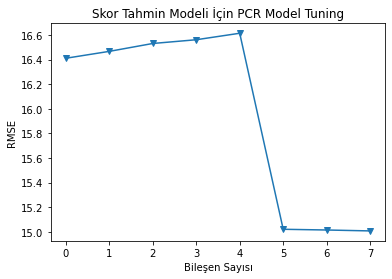

In [577]:
import matplotlib.pyplot as plt
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Skor Tahmin Modeli İçin PCR Model Tuning');

En iyi sonucun 5 bileşende olduğunu görüyoruz

In [578]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:5], y_train)
y_pred = pcr_model.predict(X_reduced_train[:,0:5])
print("RMSE Train: ",np.sqrt(mean_squared_error(y_train, y_pred)))#RMSE
y_pred = pcr_model.predict(X_reduced_test[:,0:5])
print("RMSE Test: ", np.sqrt(mean_squared_error(y_test, y_pred)))#RMSE

RMSE Train:  16.04420764190927
RMSE Test:  16.064782759159666


Tuning yaparak rmseyi 16'ya kadar indiriyoruz

###  PLS (Kısmi En Küçük Kareler Regresyonu)


***Model***

In [1040]:
X = df_one_hot.drop("Score", axis = 1)
y = df["Score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [1041]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD
#tum bilesenler alindi
pls_model = PLSRegression().fit(X_train, y_train)
#3 bilesene indirgeyebiliriz ancak bu ara katmandaki PLS factor sayisini belirler, degisken sayisi gene aynidir.
pls_model.coef_

array([[ 7.03167671],
       [ 3.75140577],
       [-2.56457984],
       [-0.5971045 ],
       [-1.29015167],
       [-0.44867747],
       [-0.54527071],
       [ 3.75140577]])

***Tahmin***

In [1042]:
X_train.head()

,Teacher_Smith,Teacher_Wesson,Gender_Male,Ethnic_Asian,Ethnic_Caucasian,Ethnic_Hispanic,Freeredu_Paid lunch,Method_Traditional
Student,,,,,,,,
121,1,0,1,0,0,1,1,0
30,0,0,1,0,1,0,1,0
20,0,0,1,1,0,0,1,0
70,0,0,1,1,0,0,1,0
98,1,0,1,1,0,0,1,0


In [1043]:
#modelin beklediği x  değerleri
pls_model.predict(X_train)

array([[68.00189509],
       [50.38804176],
       [52.24939995],
       [52.24939995],
       [67.60109364],
       [59.83174263],
       [57.37247417],
       [50.38804176],
       [73.12496931],
       [53.33956525],
       [72.72416785],
       [72.39634017],
       [74.2151346 ],
       [52.65020141],
       [75.18343631],
       [69.13462415],
       [53.7403667 ],
       [53.7403667 ],
       [50.38804176],
       [52.65020141],
       [52.65020141],
       [75.62680152],
       [70.86280966],
       [69.13462415],
       [50.38804176],
       [66.18310066],
       [74.65849982],
       [69.09206039],
       [52.65020141],
       [70.86280966],
       [70.06036209],
       [67.60109364],
       [57.77327562],
       [73.16753307],
       [74.09327101],
       [73.12496931],
       [59.83174263],
       [68.9701968 ],
       [52.65020141],
       [68.44526031],
       [68.00189509],
       [71.95297495],
       [75.18343631],
       [71.30617487],
       [58.86344092],
       [68

In [1044]:
from sklearn.metrics import mean_squared_error, r2_score
#RMSE
y_pred = pls_model.predict(X_train)
print("RMSE Train: ", np.sqrt(mean_squared_error(y_train, y_pred)))

RMSE Train:  14.352705677627425


In [1045]:
r2_score(y_train, y_pred)

0.23485229092214122

In [1046]:
#RMSE test setindeki sonuçları
y_pred = pls_model.predict(X_test)
print("RMSE Test: ",np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE Test:  15.019672703968041


Burada diğer yöntemlere göre çok daha iyi bir sonuç aldık

***Model Tuning***

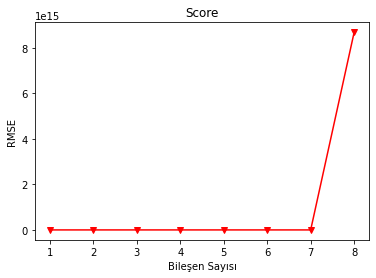

In [1047]:
#CV
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)


#Hata hesaplamak için döngü
RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Sonuçların Görselleştirilmesi
import matplotlib.pyplot as plt
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Score');

In [1063]:
#en optimum bileşen sayısını 1-ila 7 arasında buluyoruz buluyoruz
pls_model = PLSRegression(n_components = 7).fit(X_train, y_train)

In [1064]:
y_pred = pls_model.predict(X_test)

In [1065]:
#RMSE
print("RMSE Test: ",np.sqrt(mean_squared_error(y_test, y_pred)))
#Yukarıda default değeri olan 2 ile de denemiştik ve onda daha iyi bir sonuç almıştık. Demekki en optimum değer 2 olduğunda

RMSE Test:  15.14541141744588


Hata daha da düştü

### Ridge Regresyon


***Model***

In [590]:
from sklearn.linear_model import Ridge
y = df["Score"]
X = df_one_hot.drop(['Score'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)
#alpha=lambda
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)
ridge_model

Ridge(alpha=0.1)

In [591]:
ridge_model.coef_

array([15.50246027,  8.0053598 , -4.19092114, -3.24758105, -4.26976484,
       -1.86838408, -1.3966279 ,  8.0053598 ])

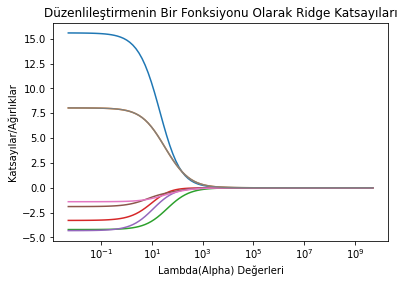

In [592]:
#belirlenen aralıkta lambda değerleri oluşturuyoruz
lambdalar = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train) 
    katsayilar.append(ridge_model.coef_) 
    

import matplotlib.pyplot as plt    
ax = plt.gca()
ax.plot(lambdalar, katsayilar) 
ax.set_xscale('log') 

plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title('Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları');

***Tahmin***

In [593]:
y_pred = ridge_model.predict(X_test)

In [594]:
from sklearn.metrics import mean_squared_error, r2_score
np.sqrt(mean_squared_error(y_test, y_pred))

15.145184937705444

***Model Tuning***

In [595]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

In [596]:
lambdalar[0:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [597]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = lambdalar, 
                   scoring = "neg_mean_squared_error",
                   normalize = True)

In [598]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        normalize=True, scoring='neg_mean_squared_error')

In [599]:
#optimum lambda değerini bulduk
ridge_cv.alpha_

0.08148754173103201

In [600]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_, 
                   normalize = True).fit(X_train,y_train)

In [601]:
print("RMSE: ",np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test))))

RMSE:  15.063861535914585


### Lasso Regresyon


***Model***

In [603]:
y = df["Score"]
X = df_one_hot.drop(['Score'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [604]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)
lasso_model

Lasso(alpha=0.1)

In [605]:
lasso_model.coef_

array([14.59101446, 15.25228964, -3.83185059, -1.61933865, -2.57334058,
       -0.42873038, -1.10062833,  0.        ])

Text(0, 0.5, 'weights')

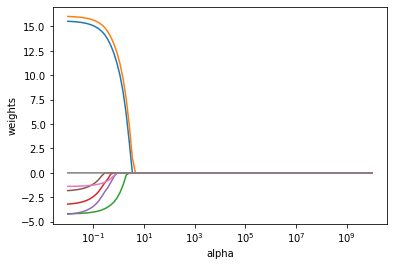

In [606]:
lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5 
katsayilar = []

for i in lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)
  
import matplotlib.pyplot as plt  
ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

***Tahmin***

In [607]:
lasso_model.predict(X_test)

array([67.07502257, 69.21963277, 71.1995999 , 72.96150342, 53.87736319,
       70.24559798, 74.58084207, 70.0877163 , 73.05148336, 69.65898592,
       72.96150342, 57.70921377, 70.90687316, 54.39607351, 54.39607351,
       69.21963277, 73.05148336, 52.92336126, 74.15211169, 57.70921377,
       68.17565091, 70.74899148, 68.46837765, 55.49670184, 70.0877163 ,
       70.3202611 , 68.17565091, 57.79919371, 54.39607351, 74.15211169,
       73.49083651, 53.96734313, 72.30022824, 67.07502257, 67.51437573,
       70.24559798, 72.39020818, 70.0877163 , 70.0877163 , 67.36774932,
       68.98708797, 70.3202611 , 70.24559798, 69.65898592, 67.51437573,
       67.36774932, 67.36774932, 69.64836315, 70.24559798, 69.21963277,
       69.64836315, 56.75521185, 53.87736319, 70.3202611 ])

In [608]:
y_pred = lasso_model.predict(X_test)

In [609]:
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  15.039280253338662


***Model Tuning***

In [610]:
from sklearn.linear_model import LassoCV

In [611]:
lasso_cv_model = LassoCV(alphas = None, 
                         cv = 10, 
                         max_iter = 10000, 
                         normalize = True)

In [612]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [613]:
lasso_cv_model.alpha_

0.05683597749977237

In [614]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)

In [619]:
lasso_tuned.fit(X_train, y_train)

Lasso(alpha=0.05683597749977237)

In [620]:
y_pred = lasso_tuned.predict(X_test)

In [621]:
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  15.080610615769983


### ElasticNet (eNet) Regresyonu


***Model***

In [622]:
y = df["Score"]
X = df_one_hot.drop(['Score'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [623]:
from sklearn.linear_model import ElasticNet
enet_model = ElasticNet().fit(X_train, y_train)
enet_model.coef_

array([ 1.95958901,  1.88628549, -0.73275383, -0.        , -0.        ,
       -0.        , -0.        ,  1.8862874 ])

In [624]:
enet_model.intercept_

63.68188301776208

***Tahmin***

In [625]:
enet_model

ElasticNet()

In [626]:
enet_model.predict(X_test)

array([66.72170207, 66.72170207, 65.64147203, 67.4544559 , 62.94912918,
       65.64147203, 67.4544559 , 64.90871819, 67.4544559 , 64.90871819,
       67.4544559 , 63.68188302, 67.4544559 , 62.94912918, 62.94912918,
       66.72170207, 67.4544559 , 62.94912918, 67.4544559 , 63.68188302,
       66.72170207, 66.72170207, 64.90871819, 62.94912918, 64.90871819,
       66.72170207, 66.72170207, 63.68188302, 62.94912918, 67.4544559 ,
       65.64147203, 62.94912918, 65.64147203, 66.72170207, 64.90871819,
       65.64147203, 65.64147203, 64.90871819, 64.90871819, 64.90871819,
       64.90871819, 66.72170207, 65.64147203, 64.90871819, 64.90871819,
       64.90871819, 64.90871819, 66.72170207, 65.64147203, 66.72170207,
       66.72170207, 63.68188302, 62.94912918, 66.72170207])

In [627]:
y_pred = enet_model.predict(X_test)

In [628]:
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  15.650613033431043


In [629]:
print("r2 score: ",r2_score(y_test, y_pred))

r2 score:  0.05051769467207812


***Model Tuning***

In [630]:
from sklearn.linear_model import ElasticNetCV

In [631]:
enet_cv_model = ElasticNetCV(cv = 10, random_state = 0).fit(X_train, y_train)

In [632]:
enet_cv_model.alpha_

0.045076571229809084

In [633]:
enet_cv_model

ElasticNetCV(cv=10, random_state=0)

In [634]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)

In [635]:
y_pred = enet_tuned.predict(X_test)

In [636]:
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  15.030807679874725


Sonuç: Doğrusal regresyon işlemlerinden yapılam modellerin en iyisi PLS (Kısmi En Küçük Kareler Regresyonu) regresyonu olarak gözlemlendi.

## Doğrusal Olmayan Reresyon

In [791]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler


from skompiler import skompile
import xgboost as xgb
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from lightgbm import LGBMRegressor

from warnings import filterwarnings
filterwarnings('ignore')

from datetime import datetime

### KNN

***Model***

In [792]:
y = df["Score"]
X = df_one_hot.drop(['Score'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

knn_model = KNeighborsRegressor().fit(X_train, y_train)

***Tahimn***

In [793]:
y_pred = knn_model.predict(X_test)

print("test hatası:" , np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE = [] 
#cross validation yapmadan hatalara bir bakalim
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)
# Görüldüğü üzere en iyi komşu değeri k=4

test hatası: 17.932775703845863
k = 1 için RMSE değeri:  16.968743960733754
k = 2 için RMSE değeri:  14.85017770189225
k = 3 için RMSE değeri:  13.85781709542328
k = 4 için RMSE değeri:  13.737690898930865
k = 5 için RMSE değeri:  13.856495557528335
k = 6 için RMSE değeri:  13.762897679548551
k = 7 için RMSE değeri:  13.784606237053245
k = 8 için RMSE değeri:  13.84854209133783
k = 9 için RMSE değeri:  14.162788947223746
k = 10 için RMSE değeri:  14.315951993544875


***Model Tuning***

In [794]:
#GridSearchCV ile optimum k sayisinin belirlenmesi
knn_params = {'n_neighbors': np.arange(1,30,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [795]:
knn_cv_model.best_params_["n_neighbors"]# Crossvalidation ile optimum k 29 çıktı

29

In [649]:
RMSE = [] 
RMSE_CV = []
for k in range(30):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    #cross validation olmadan hatalar
    RMSE.append(rmse) 
    #cross validation kullanilarak alindan hatalar
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )


k = 1 için RMSE değeri:  16.968743960733754 RMSE_CV değeri:  20.182403518032878
k = 2 için RMSE değeri:  14.85017770189225 RMSE_CV değeri:  18.75947064739803
k = 3 için RMSE değeri:  13.85781709542328 RMSE_CV değeri:  17.72342667040368
k = 4 için RMSE değeri:  13.737690898930865 RMSE_CV değeri:  17.18156715785845
k = 5 için RMSE değeri:  13.856495557528335 RMSE_CV değeri:  16.55739527326971
k = 6 için RMSE değeri:  13.762897679548551 RMSE_CV değeri:  15.875113542386401
k = 7 için RMSE değeri:  13.784606237053245 RMSE_CV değeri:  16.04118536303164
k = 8 için RMSE değeri:  13.84854209133783 RMSE_CV değeri:  15.799621659305828
k = 9 için RMSE değeri:  14.162788947223746 RMSE_CV değeri:  15.73990451770847
k = 10 için RMSE değeri:  14.315951993544875 RMSE_CV değeri:  15.635570189380967
k = 11 için RMSE değeri:  14.284244425672858 RMSE_CV değeri:  15.586842421099428
k = 12 için RMSE değeri:  14.452056102264146 RMSE_CV değeri:  15.6742514623579
k = 13 için RMSE değeri:  14.409864793778345 RMS

In [796]:
#k=2 için train degil test setini denediğimizde
knn_tuned = KNeighborsRegressor(n_neighbors =2)
knn_tuned.fit(X_train, y_train)
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

18.552228577321518

In [797]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=29)

In [798]:
print("RMSE: ",np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test))))

RMSE:  15.084193625926156


### Destek Vektör Regresyonu (SVR)


***Model (Doğrusal SVR)***

In [799]:
y = df["Score"]
X = df_one_hot.drop(['Score'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [800]:
svr_model = LinearSVR().fit(X_train, y_train)

In [801]:
svr_model.predict(X_train)[0:5]
#ilk değer için modelimizi deneyebiliriz

array([71.34406244, 54.31616521, 53.36047642, 53.36047642, 66.40222162])

In [802]:
X_train[0:1]

,Teacher_Smith,Teacher_Wesson,Gender_Male,Ethnic_Asian,Ethnic_Caucasian,Ethnic_Hispanic,Freeredu_Paid lunch,Method_Traditional
Student,,,,,,,,
121,1,0,1,0,0,1,1,0


In [803]:
print(svr_model.intercept_) # Formülün katsayıları
print(svr_model.coef_)

[37.66425667]
[13.04174521 10.01504179  5.33185585  3.03196308  3.98765188  7.9738039
  7.33240081 10.01504179]


In [804]:
#değerleri formulde yerine yazip sonucu aldigimizda dogru y degerine ulastigimizi goruyosruz. 
score =svr_model.predict([[1,0,1,0,0,1,1,0]])

In [805]:
print(score)# Gerçek skor 79

[71.34406244]


In [806]:
y_pred = svr_model.predict(X_train)

***lineer regresyon modeliyle svm modelini karsilastirma***


In [807]:
#lineer regresyon modeliyle svm modelini karsilastiralim
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print(lm_model.intercept_, lm_model.coef_)

60.33243775256834 [15.57758064  8.03317355 -4.20174142 -3.28275855 -4.3099415  -1.89013033
 -1.40069391  8.03317355]


In [808]:
score = lm_model.predict([[1,0,1,0,0,1,1,0]])

In [809]:
print(score)#Gerçeği 79 svr 71 lineer 68

[68.41745273]


***Tahmin (Doğrusal SVR)***

In [810]:
svr_model.predict([[1,0,1,0,0,1,1,0]])

array([71.34406244])

In [811]:
y_pred = svr_model.predict(X_test)

In [812]:
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  17.228646900660454


***Model Tuning (Doğrusal SVR)***

In [813]:
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)

In [814]:
pd.Series(svr_cv_model.best_params_)[0]

1.9000000000000001

In [815]:
svr_tuned = LinearSVR(C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [816]:
y_pred = svr_tuned.predict(X_test)

In [817]:
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  15.840921887101569


### Doğrusal olmayan

***Model (Doğrusal Olmayan SVR)***

In [818]:
y = df["Score"]
X = df_one_hot.drop(['Score'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [819]:
svr_rbf = SVR(kernel="rbf").fit(X_train, y_train)

***Tahmin (Doğrusal Olmayan SVR)***

In [820]:
y_pred = svr_rbf.predict(X_test)

In [821]:
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  15.714263121918986


***Model Tuning (Doğrusal Olmayan SVR)***

In [822]:
svr_params = {"C": [0.01, 0.1,0.4,5,10,20,30,40,50,60,70,80,90,100,110,120,130,140,200,300,400,500,600,700,800,900,1000,2000,3000,4000,5000,6000]}
svr_cv_model = GridSearchCV(svr_rbf,svr_params, cv = 10)
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.4, 5, 10, 20, 30, 40, 50, 60, 70,
                               80, 90, 100, 110, 120, 130, 140, 200, 300, 400,
                               500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, ...]})

In [823]:
svr_cv_model.best_params_

{'C': 5}

In [824]:
svr_tuned = SVR(kernel="rbf", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, 
                                                                        y_train)


In [825]:
y_pred = svr_tuned.predict(X_test)

print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  15.803948497549648


## Çok Katmanlı Algılayıcı (Yapay Sinir Ağları YSA)

In [826]:
y = df["Score"]
X = df_one_hot.drop(['Score'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [827]:
#değişken standartlaştırması
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [828]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)
print(mlp_model)
print(mlp_model.n_layers_)
print(mlp_model.hidden_layer_sizes)

MLPRegressor(hidden_layer_sizes=(100, 20))
4
(100, 20)


***Tahmin***

In [829]:
y_pred = mlp_model.predict(X_test_scaled)
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  18.194658844327837


***Model Tuning***

In [830]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [831]:
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
             'activation': ['relu','logistic']}

In [832]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)
mlp_cv_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (300, 200, 150)]})

In [833]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (300, 200, 150)}

In [834]:
mlp_tuned = MLPRegressor(activation=mlp_cv_model.best_params_['activation'],
                         alpha = mlp_cv_model.best_params_['alpha'], 
                         hidden_layer_sizes = mlp_cv_model.best_params_['hidden_layer_sizes'])
print(mlp_tuned)
print(mlp_tuned.activation)

MLPRegressor(alpha=0.01, hidden_layer_sizes=(300, 200, 150))
relu


In [835]:
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0.01, hidden_layer_sizes=(300, 200, 150))

In [836]:
y_pred = mlp_tuned.predict(X_test_scaled)
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  16.978962435226343


## Karar Ağaçları / Classification and Regression Trees (CART)

***Model***

In [837]:
y = df["Score"]
X = df_one_hot.drop(['Score'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [838]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

***Tahmin***

In [839]:
#skompiler kutuphanesi ile karar agacinin karar modelini python koduna ceviriyoruz
print(skompile(cart_model.predict).to('python/code'))

(((((((57.8 if x[3] <= 0.5 else 56.6) if x[6] <= 0.5 else 56.75 if x[3] <= 
    0.5 else 65.33333333333333) if x[4] <= 0.5 else 66.0) if x[5] <= 0.5 else
    57.25 if x[6] <= 0.5 else 53.166666666666664) if x[2] <= 0.5 else (((
    48.0 if x[6] <= 0.5 else 51.0) if x[4] <= 0.5 else 54.0 if x[6] <= 0.5 else
    55.4) if x[5] <= 0.5 else 57.2 if x[6] <= 0.5 else 56.375) if x[3] <= 
    0.5 else 57.5 if x[6] <= 0.5 else 38.333333333333336) if x[0] <= 0.5 else
    (((70.0 if x[4] <= 0.5 else 74.5) if x[6] <= 0.5 else (79.5 if x[4] <= 
    0.5 else 77.5) if x[3] <= 0.5 else 77.5) if x[5] <= 0.5 else 75.5 if x[
    6] <= 0.5 else 67.75) if x[2] <= 0.5 else (((81.33333333333333 if x[6] <=
    0.5 else 66.25) if x[5] <= 0.5 else 65.5 if x[6] <= 0.5 else 73.5) if x
    [3] <= 0.5 else 70.5 if x[6] <= 0.5 else 63.375) if x[4] <= 0.5 else 
    60.0 if x[6] <= 0.5 else 53.5) if x[7] <= 0.5 else ((((81.25 if x[2] <=
    0.5 else 86.0) if x[5] <= 0.5 else 67.83333333333333 if x[2] <= 0.5 else
    82

In [840]:
X_test[0:5]

,Teacher_Smith,Teacher_Wesson,Gender_Male,Ethnic_Asian,Ethnic_Caucasian,Ethnic_Hispanic,Freeredu_Paid lunch,Method_Traditional
Student,,,,,,,,
202,0,1,1,0,1,0,1,1
214,0,1,1,0,0,1,1,1
139,1,0,0,1,0,0,1,0
178,0,1,0,1,0,0,0,1
16,0,0,1,1,0,0,0,0


In [841]:
cart_model.predict(X_test)[0:5]

array([59.4       , 68.33333333, 77.5       , 67.5       , 57.5       ])

In [842]:
print(df.Score[202])#59
print(df.Score[214])#68
print(df.Score[139])#77
print(df.Score[178])#67
print(df.Score[16])#57



79.0
91.0
71.0
82.0
68.0


In [843]:
cart_model.predict([[1,0,1,0,0,1,1,0]])#Gerçeği 79

array([73.5])

In [844]:
y_pred =cart_model.predict(X_test)
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  16.908677186507845


***Model Tuning***

In [845]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [846]:
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  16.908677186507845


In [847]:
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}

In [848]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [849]:
cart_cv_model.best_params_

{'max_leaf_nodes': 4, 'min_samples_split': 47}

In [850]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 4, min_samples_split = 47)

In [851]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=4, min_samples_split=47)

In [852]:
y_pred = cart_tuned.predict(X_test)

In [853]:
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  15.475116678947494


## Bagged Trees Regresyon

***Model***

In [854]:
y = df["Score"]
X = df_one_hot.drop(['Score'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [855]:
#bootstrap_features default degeri false, bootstrap orneklerini gozlemlemek icin true verdik
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [856]:
#tahminci sayisi
bag_model.n_estimators

10

In [857]:
#10 adet agac
bag_model.estimators_

[DecisionTreeRegressor(random_state=1115697137),
 DecisionTreeRegressor(random_state=1437743744),
 DecisionTreeRegressor(random_state=507867140),
 DecisionTreeRegressor(random_state=2033343252),
 DecisionTreeRegressor(random_state=1197485315),
 DecisionTreeRegressor(random_state=587693396),
 DecisionTreeRegressor(random_state=163701513),
 DecisionTreeRegressor(random_state=1521233034),
 DecisionTreeRegressor(random_state=1790641966),
 DecisionTreeRegressor(random_state=1923258134)]

In [858]:
#her bir agacin ornekleri
bag_model.estimators_samples_

[array([113, 132, 152, 101,  43,  71, 109,  22,  41, 111,  75, 160,   0,
        153,  42,  71,  57,  62, 160,  88,  67, 143,  23,  43,  54,  97,
         87, 112, 137,  97,  40,  16,  81, 103,  42,  74,  91, 160,  44,
         89, 107, 107, 126,  41,  33,  56,  74,  35, 136,  65,  24, 125,
        124,  76,  83, 131, 111, 115,  91,  74, 114,   3,  92, 123,  42,
         22,  71,  86,  17,  61, 113,  32, 152, 139,  71, 119, 112,  74,
         36,  68, 111,  54,  51, 145,   0, 119, 141, 117, 114,  33,   3,
        104,  50, 105,  34,   7,  25, 128, 139,   2, 130,  62,  49,  10,
         43,  14,  76,  26, 127, 139,  25, 119,  76, 107,  78, 155, 120,
        104, 151,  63,  70,  10,  10,  93, 122, 108,  94,  80, 127, 145,
        123, 157, 160,  43,   5, 142, 131, 104, 136,  51,  21,  75, 152,
        126,  40,  32, 115,  49, 123,  35,  91,  48, 136, 134, 126,  30,
         65,  24, 122, 158,  36, 145]),
 array([ 39,  94, 100,  58, 113, 134,  49,  83, 135,  27, 151,  61,  68,
        112

In [859]:
#her agacin bagimsiz degiskenleri
bag_model.estimators_features_

[array([1, 6, 2, 2, 3, 2, 0, 4]),
 array([0, 7, 4, 4, 6, 6, 5, 0]),
 array([4, 4, 7, 7, 4, 2, 4, 3]),
 array([4, 7, 6, 0, 6, 6, 1, 3]),
 array([3, 7, 6, 1, 4, 1, 7, 5]),
 array([4, 1, 1, 3, 2, 6, 1, 1]),
 array([1, 7, 6, 1, 6, 4, 0, 1]),
 array([2, 7, 3, 5, 0, 5, 3, 1]),
 array([6, 4, 1, 5, 1, 0, 0, 0]),
 array([6, 7, 4, 7, 5, 2, 2, 3])]

***Tahmin***

In [860]:
y_pred = bag_model.predict(X_test)
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  15.578289013383845


In [861]:
iki_y_pred = bag_model.estimators_[1].fit(X_train, y_train).predict(X_test)

In [862]:
print("RMSE: ",np.sqrt(mean_squared_error(y_test, iki_y_pred)))

RMSE:  16.908677186507845


In [863]:
yedi_y_pred = bag_model.estimators_[6].fit(X_train, y_train).predict(X_test)

In [864]:
print("RMSE: ",np.sqrt(mean_squared_error(y_test, yedi_y_pred)))

RMSE:  16.908677186507845


***Model Tuning***

In [865]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [866]:
bag_params = {"n_estimators": range(2,20)}

In [867]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10)

In [868]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             param_grid={'n_estimators': range(2, 20)})

In [869]:
bag_cv_model.best_params_

{'n_estimators': 15}

In [870]:
bag_tuned = BaggingRegressor( n_estimators = 15, random_state = 45)

In [871]:
bag_tuned.fit(X_train, y_train)

BaggingRegressor(n_estimators=15, random_state=45)

In [872]:
y_pred = bag_tuned.predict(X_test)

In [873]:
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  16.612592455903425


## Random Forests

In [874]:
y = df["Score"]
X = df_one_hot.drop(['Score'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [875]:
rf_model = RandomForestRegressor(random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

***Tahmin***

In [877]:
rf_model.predict(X_test)[0:5]

array([60.19849856, 69.4897619 , 76.59729582, 67.2189246 , 54.18430952])

In [878]:
y_pred = rf_model.predict(X_test)

In [880]:
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  16.877922127909912


***Model Tuning***

In [882]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000, 2000]}
rf_model = RandomForestRegressor(random_state = 42)
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1)
# n_jobs = -1 yukarida yapılacak hesap sayisi her bir degerin kombinasyonu dusunuldugunde cok fazla olmaktadır.
#n_jobs parametresi islemcinin paralel yurutebilecegi islemleri ayni anda yurutmesini saglamaktadır.

In [883]:
rf_cv_model.fit(X_train, y_train)
rf_cv_model.best_params_

{'max_depth': 2, 'max_features': 10, 'n_estimators': 1000}

In [884]:
rf_tuned = RandomForestRegressor(max_depth  = 2, 
                                 max_features = 10, 
                                 n_estimators =1000)

In [885]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, max_features=10, n_estimators=1000)

In [886]:
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

15.21216178628981

In [887]:
#degiskenlerin onem duzeyine bir bakalim.
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

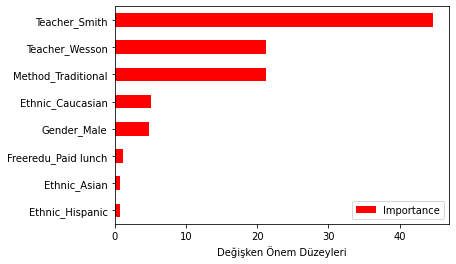

In [888]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

## Gradient Boosting Machines (GBM)

***Model***

In [941]:
y = df["Score"]
X = df_one_hot.drop(['Score'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [942]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

***Tahmin***

In [891]:
y_pred = gbm_model.predict(X_test)
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  16.481549111227746


***Model Tuning***

In [893]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [894]:
#algoritmanın calisma zamanina da bir bakalim
t1 =  datetime.now()
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)

t2 =  datetime.now()
print(t2-t1)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
0:06:48.047335


In [895]:
gbm_cv_model.best_params_

{'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 1}

In [943]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.001,  
                                      max_depth = 3, 
                                      n_estimators = 1000, 
                                      subsample = 1)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [944]:
y_pred = gbm_tuned.predict(X_test)
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  15.445003778723628


In [945]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

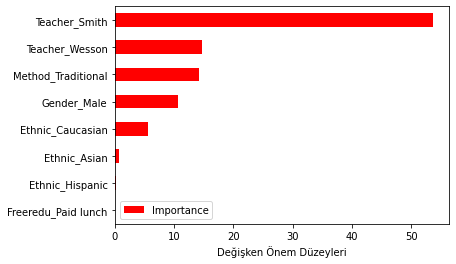

In [946]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

## XGBoost (eXtreme Gradient Boosting)

***Model***

In [902]:
y = df["Score"]
X = df_one_hot.drop(['Score'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [903]:
#pandas ya da numpy yerine kendi dataframeini kullanırsaniz daha performanslı calıstigi soylenmis.
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [904]:
#pandas dataframei ile de kullanılabilir.
xgb_model = XGBRegressor().fit(X_train, y_train)

***Tahmin***

In [906]:
y_pred = xgb_model.predict(X_test)
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  16.940276277825646


***Model Tuning***

In [908]:
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [909]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}


In [910]:
t1 =  datetime.now()

xgb = XGBRegressor()
xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)

xgb_cv.fit(X_train, y_train)

t2 =  datetime.now()
print(t2-t1)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits
0:01:59.700200


In [912]:
xgb_cv.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.01,
 'max_depth': 2,
 'n_estimators': 500}

In [914]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.4, 
                         learning_rate = 0.01, 
                         max_depth = 2, 
                         n_estimators = 500) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [915]:
y_pred = xgb_tuned.predict(X_test)
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  15.243291937646118


## Light GBM

***Model***

In [916]:
y = df["Score"]
X = df_one_hot.drop(['Score'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [917]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

***Tahmin***

In [919]:
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)

In [920]:
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  16.203912177456143


***Model Tuning***

In [921]:
lgbm_model

LGBMRegressor()

In [922]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [923]:
t1 =  datetime.now()
lgbm_cv_model.fit(X_train, y_train)
t2 =  datetime.now()
print(t2-t1)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits
0:02:04.975263


In [924]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 20}

In [925]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 2, 
                           n_estimators = 20,
                          colsample_bytree = 0.9)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [926]:
y_pred = lgbm_tuned.predict(X_test)

In [927]:
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  15.265676248952508


## CatBoost

***Model***

In [929]:
y = df["Score"]
X = df_one_hot.drop(['Score'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [930]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

Learning rate set to 0.03071
0:	learn: 16.3047997	total: 157ms	remaining: 2m 37s
1:	learn: 16.2109857	total: 158ms	remaining: 1m 18s
2:	learn: 16.1143288	total: 159ms	remaining: 52.8s
3:	learn: 16.0220597	total: 160ms	remaining: 39.8s
4:	learn: 15.9455552	total: 161ms	remaining: 32s
5:	learn: 15.8574543	total: 162ms	remaining: 26.8s
6:	learn: 15.8120128	total: 162ms	remaining: 23s
7:	learn: 15.7434749	total: 163ms	remaining: 20.2s
8:	learn: 15.6671551	total: 164ms	remaining: 18.1s
9:	learn: 15.5944355	total: 165ms	remaining: 16.3s
10:	learn: 15.5231914	total: 166ms	remaining: 14.9s
11:	learn: 15.4633769	total: 166ms	remaining: 13.7s
12:	learn: 15.4071827	total: 167ms	remaining: 12.6s
13:	learn: 15.3883416	total: 167ms	remaining: 11.7s
14:	learn: 15.3360148	total: 167ms	remaining: 11s
15:	learn: 15.2852964	total: 168ms	remaining: 10.3s
16:	learn: 15.2322633	total: 169ms	remaining: 9.78s
17:	learn: 15.1701166	total: 170ms	remaining: 9.29s
18:	learn: 15.1044510	total: 172ms	remaining: 8.8

267:	learn: 12.9945264	total: 366ms	remaining: 999ms
268:	learn: 12.9926689	total: 367ms	remaining: 997ms
269:	learn: 12.9907772	total: 368ms	remaining: 996ms
270:	learn: 12.9889985	total: 369ms	remaining: 994ms
271:	learn: 12.9871922	total: 370ms	remaining: 992ms
272:	learn: 12.9858350	total: 371ms	remaining: 989ms
273:	learn: 12.9845232	total: 373ms	remaining: 987ms
274:	learn: 12.9830009	total: 374ms	remaining: 985ms
275:	learn: 12.9817442	total: 375ms	remaining: 983ms
276:	learn: 12.9803218	total: 376ms	remaining: 981ms
277:	learn: 12.9787305	total: 377ms	remaining: 979ms
278:	learn: 12.9771144	total: 378ms	remaining: 977ms
279:	learn: 12.9755536	total: 379ms	remaining: 976ms
280:	learn: 12.9740462	total: 381ms	remaining: 974ms
281:	learn: 12.9729134	total: 382ms	remaining: 973ms
282:	learn: 12.9714392	total: 384ms	remaining: 972ms
283:	learn: 12.9700130	total: 385ms	remaining: 972ms
284:	learn: 12.9685982	total: 387ms	remaining: 970ms
285:	learn: 12.9675548	total: 388ms	remaining:

529:	learn: 12.8862620	total: 725ms	remaining: 642ms
530:	learn: 12.8862115	total: 726ms	remaining: 641ms
531:	learn: 12.8861606	total: 727ms	remaining: 640ms
532:	learn: 12.8861337	total: 729ms	remaining: 639ms
533:	learn: 12.8861076	total: 730ms	remaining: 637ms
534:	learn: 12.8860588	total: 732ms	remaining: 636ms
535:	learn: 12.8860084	total: 733ms	remaining: 634ms
536:	learn: 12.8859618	total: 734ms	remaining: 633ms
537:	learn: 12.8859146	total: 737ms	remaining: 633ms
538:	learn: 12.8858698	total: 738ms	remaining: 631ms
539:	learn: 12.8858453	total: 742ms	remaining: 632ms
540:	learn: 12.8858215	total: 743ms	remaining: 631ms
541:	learn: 12.8857774	total: 744ms	remaining: 629ms
542:	learn: 12.8857545	total: 745ms	remaining: 627ms
543:	learn: 12.8857325	total: 747ms	remaining: 626ms
544:	learn: 12.8856856	total: 748ms	remaining: 624ms
545:	learn: 12.8856440	total: 749ms	remaining: 623ms
546:	learn: 12.8856229	total: 750ms	remaining: 621ms
547:	learn: 12.8855827	total: 752ms	remaining:

779:	learn: 12.8825294	total: 1.08s	remaining: 306ms
780:	learn: 12.8825263	total: 1.09s	remaining: 305ms
781:	learn: 12.8825253	total: 1.09s	remaining: 303ms
782:	learn: 12.8825243	total: 1.09s	remaining: 302ms
783:	learn: 12.8825195	total: 1.09s	remaining: 300ms
784:	learn: 12.8825185	total: 1.09s	remaining: 299ms
785:	learn: 12.8825176	total: 1.09s	remaining: 298ms
786:	learn: 12.8825146	total: 1.09s	remaining: 296ms
787:	learn: 12.8825100	total: 1.1s	remaining: 295ms
788:	learn: 12.8825071	total: 1.1s	remaining: 294ms
789:	learn: 12.8825062	total: 1.1s	remaining: 293ms
790:	learn: 12.8825015	total: 1.1s	remaining: 291ms
791:	learn: 12.8824969	total: 1.1s	remaining: 290ms
792:	learn: 12.8824960	total: 1.1s	remaining: 288ms
793:	learn: 12.8824933	total: 1.1s	remaining: 287ms
794:	learn: 12.8824925	total: 1.11s	remaining: 285ms
795:	learn: 12.8824916	total: 1.11s	remaining: 284ms
796:	learn: 12.8824891	total: 1.11s	remaining: 282ms
797:	learn: 12.8824883	total: 1.11s	remaining: 281ms


***Tahmin***

In [933]:
y_pred = catb_model.predict(X_test)
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  16.888321464267445


***Model Tuning***

In [934]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

In [935]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)

In [936]:
t1 =  datetime.now()
catb_cv_model.fit(X_train, y_train)
t2 =  datetime.now()
print(t2-t1)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
0:	learn: 16.3742885	total: 425us	remaining: 84.7ms
1:	learn: 16.3438303	total: 1.03ms	remaining: 102ms
2:	learn: 16.3135531	total: 1.33ms	remaining: 87.3ms
3:	learn: 16.2840717	total: 1.64ms	remaining: 80.4ms
4:	learn: 16.2547600	total: 1.93ms	remaining: 75.4ms
5:	learn: 16.2442253	total: 2.14ms	remaining: 69.1ms
6:	learn: 16.2145682	total: 2.39ms	remaining: 65.9ms
7:	learn: 16.1866913	total: 2.67ms	remaining: 64.2ms
8:	learn: 16.1590562	total: 2.97ms	remaining: 63ms
9:	learn: 16.1291129	total: 3.25ms	remaining: 61.8ms
10:	learn: 16.1013655	total: 3.52ms	remaining: 60.5ms
11:	learn: 16.0750782	total: 3.8ms	remaining: 59.5ms
12:	learn: 16.0464911	total: 4.11ms	remaining: 59.1ms
13:	learn: 16.0209387	total: 4.39ms	remaining: 58.4ms
14:	learn: 15.9949872	total: 4.66ms	remaining: 57.5ms
15:	learn: 15.9702817	total: 4.94ms	remaining: 56.8ms
16:	learn: 15.9460916	total: 5.21ms	remaining: 56.1ms
17:	learn: 15.9195867	total: 5.5ms	

In [937]:
catb_cv_model.best_params_

{'depth': 3, 'iterations': 200, 'learning_rate': 0.01}

In [939]:
catb_tuned = CatBoostRegressor(iterations = 200, 
                               learning_rate = 0.01, 
                               depth = 3)

catb_tuned = catb_tuned.fit(X_train,y_train)

0:	learn: 16.3742885	total: 369us	remaining: 73.5ms
1:	learn: 16.3438303	total: 845us	remaining: 83.7ms
2:	learn: 16.3135531	total: 1.1ms	remaining: 72.5ms
3:	learn: 16.2840717	total: 1.37ms	remaining: 67ms
4:	learn: 16.2547600	total: 1.63ms	remaining: 63.5ms
5:	learn: 16.2442253	total: 1.81ms	remaining: 58.6ms
6:	learn: 16.2145682	total: 2.08ms	remaining: 57.4ms
7:	learn: 16.1866913	total: 2.34ms	remaining: 56.2ms
8:	learn: 16.1590562	total: 2.6ms	remaining: 55.2ms
9:	learn: 16.1291129	total: 2.87ms	remaining: 54.4ms
10:	learn: 16.1013655	total: 3.12ms	remaining: 53.7ms
11:	learn: 16.0750782	total: 3.4ms	remaining: 53.3ms
12:	learn: 16.0464911	total: 3.67ms	remaining: 52.8ms
13:	learn: 16.0209387	total: 3.92ms	remaining: 52.1ms
14:	learn: 15.9949872	total: 4.15ms	remaining: 51.2ms
15:	learn: 15.9702817	total: 4.42ms	remaining: 50.9ms
16:	learn: 15.9460916	total: 4.68ms	remaining: 50.4ms
17:	learn: 15.9195867	total: 4.96ms	remaining: 50.1ms
18:	learn: 15.8953240	total: 5.22ms	remaining

In [940]:
y_pred = catb_tuned.predict(X_test)
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  15.218603379607593


 Doğrusal olmayan regresyon işlemlerinde en iyi sonucu KNN Verdi o yüzden onun üzerinde biraz daha yoğunlaşıyoruz

## Yoğun KNN

In [957]:

y = df["Score"]
X = df_one_hot.drop(['Score'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [1028]:

knn_grid = {
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
    'p' : [1,2],
    'metric' : ['minkowski','euclidean','manhattan'],
    'n_jobs':[0.5,1,1.5,2]}

In [1029]:
#GridSearchCV ile optimum k sayisinin belirlenmesi
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_grid, verbose = 3, cv=10, n_jobs = -1)
knn_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9408 candidates, totalling 94080 fits


GridSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_jobs': [0.5, 1, 1.5, 2], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [1030]:
knn_cv_model.best_params_

{'algorithm': 'auto',
 'leaf_size': 37,
 'metric': 'minkowski',
 'n_jobs': 1,
 'p': 1,
 'weights': 'uniform'}

In [1038]:
knn_tuned = KNeighborsRegressor(algorithm = 'auto', 
                                leaf_size =  37, 
                                 p = 1,
                                 metric= 'minkowski',
                               weights = 'uniform', 
                               n_neighbors = 29,
                               n_jobs = 1)

knn_tuned = knn_tuned.fit(X_train,y_train)

In [1039]:
y_pred = knn_tuned.predict(X_test)
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))# Eski RMSE:  15.084193625926156
# Bir önceki sonuç ile aynı

RMSE:  15.084193625926156


In [1018]:
#Sıfır parametreli hali
knn_tuned = KNeighborsRegressor()

knn_tuned = knn_tuned.fit(X_train,y_train)
y_pred = knn_tuned.predict(X_test)
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))# Eski RMSE:  15.084193625926156

RMSE:  17.932775703845863


In [1019]:
#Sadece komuşu sayısının değiştirilmiş hali
knn_tuned = KNeighborsRegressor(n_neighbors = 29)

knn_tuned = knn_tuned.fit(X_train,y_train)
y_pred = knn_tuned.predict(X_test)
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))# Eski RMSE:  15.084193625926156

RMSE:  15.084193625926156


In [980]:
knn_tuned = KNeighborsRegressor(algorithm = 'auto', 
                                leaf_size =  7, 
                               p = 1,
                               weights = 'uniform', 
                               n_neighbors = 29)

knn_tuned = knn_tuned.fit(X_train,y_train)

In [981]:
y_pred = knn_tuned.predict(X_test)
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))# Eski RMSE:  15.084193625926156
# Leaf sizeı değiştirmek o kadar etkilemedi

RMSE:  15.243270341475524


In [983]:
knn_tuned = KNeighborsRegressor(algorithm = 'auto', 
                                leaf_size =  37, 
                               p = 1,
                               weights = 'uniform', 
                               n_neighbors = 9)

knn_tuned = knn_tuned.fit(X_train,y_train)

In [984]:
y_pred = knn_tuned.predict(X_test)
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))# Eski RMSE:  15.084193625926156
# Komşu sayısını değiştirmek etkiledi

RMSE:  16.838367960519378


In [986]:

knn_tuned = KNeighborsRegressor(algorithm = 'auto', 
                                leaf_size =  37, 
                               p = 1,
                               weights = 'distance', 
                               n_neighbors = 29)

knn_tuned = knn_tuned.fit(X_train,y_train)
y_pred = knn_tuned.predict(X_test)
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))# Eski RMSE:  15.084193625926156
# Weighti değiştirmek de etkiledi

RMSE:  16.879811138205202


In [987]:

knn_tuned = KNeighborsRegressor(algorithm = 'ball_tree', 
                                leaf_size =  37, 
                               p = 1,
                               weights = 'distance', 
                               n_neighbors = 9)

knn_tuned = knn_tuned.fit(X_train,y_train)
y_pred = knn_tuned.predict(X_test)
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))# Eski RMSE:  15.084193625926156
# Algorithimi değiştirmek de etkiledi

RMSE:  16.96813977693819


***Sonuç:*** Bu KNN modelinde en önemli parametre komşu sayısını belirlemek. Otomatik verilen diğer parametreler zaten modelin en iyi sonuş verdiği parametreler

,Models,SONUÇ
0,Doğrusal Regresyon,15.180481
1,Çoklu Doğrusal Regresyon,17.052479
2,PCR,16.064783
3,PLS,15.019673
4,Ridge Regresyon,15.063862
5,Lasso Regresyon,15.080611
6,eNet,15.030808
7,KNN,15.084194
8,SVR Doğrusal,15.840922
9,SVR Doğrusal Olmayan,15.803948


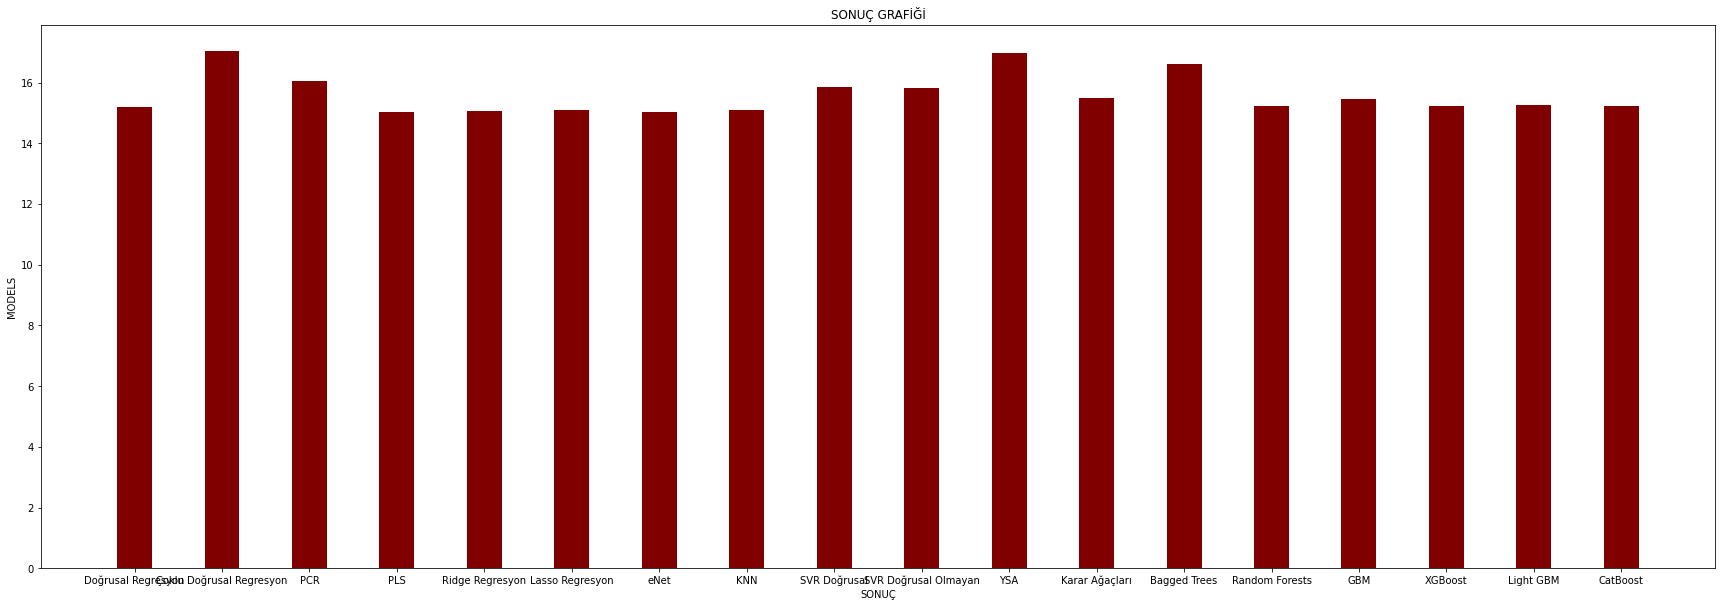

In [1072]:
data = {'Models': ['Doğrusal Regresyon','Çoklu Doğrusal Regresyon','PCR','PLS','Ridge Regresyon','Lasso Regresyon','eNet','KNN','SVR Doğrusal','SVR Doğrusal Olmayan','YSA','Karar Ağaçları','Bagged Trees','Random Forests','GBM','XGBoost','Light GBM','CatBoost'],
       'SONUÇ': [15.180480552206452,17.05247918162859,16.064782759159666,15.019672703968041,15.063861535914585,15.080610615769983,15.030807679874725,15.084193625926156,15.840921887101569,15.803948497549648,16.978962435226343,15.475116678947494,16.612592455903425,15.21216178628981,15.445003778723628,15.243291937646118,15.265676248952508,15.218603379607593]}

result = pd.DataFrame(data)
display(result)

dataResult = {'Doğrusal Regresyon': 15.180480552206452,
'Çoklu Doğrusal Regresyon': 17.05247918162859,
 'PCR':  16.064782759159666,
'PLS': 15.019672703968041,
'Ridge Regresyon': 15.063861535914585,
'Lasso Regresyon': 15.080610615769983,
'eNet': 15.030807679874725,
'KNN': 15.084193625926156,
'SVR Doğrusal': 15.840921887101569,
'SVR Doğrusal Olmayan': 15.803948497549648,
'YSA': 16.978962435226343,
'Karar Ağaçları': 15.475116678947494,
'Bagged Trees': 16.612592455903425,
'Random Forests': 15.2121617862,
'GBM': 15.445003778723628,
'XGBoost': 15.243291937646118,
'Light GBM': 15.265676248952508,
'CatBoost': 15.218603379607593}
models = list(dataResult.keys())
values  = list(dataResult.values())
fig = plt.figure(figsize = (30,10))

plt.bar(models, values, color= 'maroon', width = 0.4)
plt.xlabel('SONUÇ')
plt.ylabel('MODELS')
plt.title('SONUÇ GRAFİĞİ')
plt.show()